 # Mechanisms of Action (MoA) Prediction
 
 * The importance of the Mechanism of Action (MoA) of a drug

In the past, scientists derived drugs from natural products or were inspired by traditional remedies. Very common drugs, such as paracetamol, known in the US as acetaminophen, were put into clinical use decades before the biological mechanisms driving their pharmacological activities were understood. Today, with the advent of more powerful technologies, drug discovery has changed from the serendipitous approaches of the past to a more targeted model based on an understanding of the underlying biological mechanism of a disease. In this new framework, scientists seek to identify a protein target associated with a disease and develop a molecule that can modulate that protein target. As a shorthand to describe the biological activity of a given molecule, scientists assign a label referred to as mechanism-of-action or MoA for short.

By treat a sample of human cells with the drug and then analyze the cellular responses with algorithms that search for similarity to known patterns in large genomic databases, such as libraries of gene expression or cell viability patterns of drugs with known MoAs.

This dataset combines gene expression and cell viability data. It is based on a new technology that measures simultaneously (within the same samples) human cells’ responses to drugs in a pool of 100 different cell types (thus solving the problem of identifying ex-ante, which cell types are better suited for a given drug). In addition, shows the MoA annotations for more than 5,000 drugs.


Reference [Kaggle] (https://www.kaggle.com/c/lish-moa)

The dataset is  compost of embrionary cells experiments, each line represent one experiment id, submitted to a type of treatment, a specific time of observation, the number of dosage, a drug exposure or not, and consequences of the experiments.

## Importing libraries, read and load Dataframe

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Set plot style 
plt.style.use('seaborn')
sns.set_style('whitegrid')

url = 'https://github.com/alura-cursos/imersaodados3/blob/e36689c3d64c76ae8f16723ea0903bee10c89c3c/dados/dados_experimentos.zip?raw=true'
#read the url and unziped
data = pd.read_csv(url, compression='zip')

pd.set_option('display.max.columns', None)
#display the 5 first rows of the dataset
data.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50,g-51,g-52,g-53,g-54,g-55,g-56,g-57,g-58,g-59,g-60,g-61,g-62,g-63,g-64,g-65,g-66,g-67,g-68,g-69,g-70,g-71,g-72,g-73,g-74,g-75,g-76,g-77,g-78,g-79,g-80,g-81,g-82,g-83,g-84,g-85,g-86,g-87,g-88,g-89,g-90,g-91,g-92,g-93,g-94,g-95,g-96,g-97,g-98,g-99,g-100,g-101,g-102,g-103,g-104,g-105,g-106,g-107,g-108,g-109,g-110,g-111,g-112,g-113,g-114,g-115,g-116,g-117,g-118,g-119,g-120,g-121,g-122,g-123,g-124,g-125,g-126,g-127,g-128,g-129,g-130,g-131,g-132,g-133,g-134,g-135,g-136,g-137,g-138,g-139,g-140,g-141,g-142,g-143,g-144,g-145,g-146,g-147,g-148,g-149,g-150,g-151,g-152,g-153,g-154,g-155,g-156,g-157,g-158,g-159,g-160,g-161,g-162,g-163,g-164,g-165,g-166,g-167,g-168,g-169,g-170,g-171,g-172,g-173,g-174,g-175,g-176,g-177,g-178,g-179,g-180,g-181,g-182,g-183,g-184,g-185,g-186,g-187,g-188,g-189,g-190,g-191,g-192,g-193,g-194,g-195,g-196,g-197,g-198,g-199,g-200,g-201,g-202,g-203,g-204,g-205,g-206,g-207,g-208,g-209,g-210,g-211,g-212,g-213,g-214,g-215,g-216,g-217,g-218,g-219,g-220,g-221,g-222,g-223,g-224,g-225,g-226,g-227,g-228,g-229,g-230,g-231,g-232,g-233,g-234,g-235,g-236,g-237,g-238,g-239,g-240,g-241,g-242,g-243,g-244,g-245,g-246,g-247,g-248,g-249,g-250,g-251,g-252,g-253,g-254,g-255,g-256,g-257,g-258,g-259,g-260,g-261,g-262,g-263,g-264,g-265,g-266,g-267,g-268,g-269,g-270,g-271,g-272,g-273,g-274,g-275,g-276,g-277,g-278,g-279,g-280,g-281,g-282,g-283,g-284,g-285,g-286,g-287,g-288,g-289,g-290,g-291,g-292,g-293,g-294,g-295,g-296,g-297,g-298,g-299,g-300,g-301,g-302,g-303,g-304,g-305,g-306,g-307,g-308,g-309,g-310,g-311,g-312,g-313,g-314,g-315,g-316,g-317,g-318,g-319,g-320,g-321,g-322,g-323,g-324,g-325,g-326,g-327,g-328,g-329,g-330,g-331,g-332,g-333,g-334,g-335,g-336,g-337,g-338,g-339,g-340,g-341,g-342,g-343,g-344,g-345,g-346,g-347,g-348,g-349,g-350,g-351,g-352,g-353,g-354,g-355,g-356,g-357,g-358,g-359,g-360,g-361,g-362,g-363,g-364,g-365,g-366,g-367,g-368,g-369,g-370,g-371,g-372,g-373,g-374,g-375,g-376,g-377,g-378,g-379,g-380,g-381,g-382,g-383,g-384,g-385,g-386,g-387,g-388,g-389,g-390,g-391,g-392,g-393,g-394,g-395,g-396,g-397,g-398,g-399,g-400,g-401,g-402,g-403,g-404,g-405,g-406,g-407,g-408,g-409,g-410,g-411,g-412,g-413,g-414,g-415,g-416,g-417,g-418,g-419,g-420,g-421,g-422,g-423,g-424,g-425,g-426,g-427,g-428,g-429,g-430,g-431,g-432,g-433,g-434,g-435,g-436,g-437,g-438,g-439,g-440,g-441,g-442,g-443,g-444,g-445,g-446,g-447,g-448,g-449,g-450,g-451,g-452,g-453,g-454,g-455,g-456,g-457,g-458,g-459,g-460,g-461,g-462,g-463,g-464,g-465,g-466,g-467,g-468,g-469,g-470,g-471,g-472,g-473,g-474,g-475,g-476,g-477,g-478,g-479,g-480,g-481,g-482,g-483,g-484,g-485,g-486,g-487,g-488,g-489,g-490,g-491,g-492,g-493,g-494,g-495,g-496,g-497,g-498,g-499,g-500,g-501,g-502,g-503,g-504,g-505,g-506,g-507,g-508,g-509,g-510,g-511,g-512,g-513,g-514,g-515,g-516,g-517,g-518,g-519,g-520,g-521,g-522,g-523,g-524,g-525,g-526,g-527,g-528,g-529,g-530,g-531,g-532,g-533,g-534,g-535,g-536,g-537,g-538,g-539,g-540,g-541,g-542,g-543,g-544,g-545,g-546,g-547,g-548,g-549,g-550,g-551,g-552,g-553,g-554,g-555,g-556,g-557,g-558,g-559,g-560,g-561,g-562,g-563,g-564,g-565,g-566,g-567,g-568,g-569,g-570,g-571,g-572,g-573,g-574,g-575,g-576,g-577,g-578,g-579,g-580,g-581,g-582,g-583,g-584,g-585,g-586,g-587,g-588,g-589,g-590,g-591,g-592,g-593,g-594,g-595,g-596,g-597,g-598,g-599,g-600,g-601,g-602,g-603,g-604,g-605,g-606,g-607,g-608,g-609,g-610,g-611,g-612,g-613,g-614,g-615,g-616,g-617,g-618,g-619,g-620,g-621,g-622,g-623,g-624,g-625,g-626,g-627,g-628,g-629,g-630,g-631,g-632,g-633,g-634,g-635,g-636,g-637,g-638,g-639,g-640,g-641,g-642,g-643,g-644,g-645,g-646,g-647,g-648,g-649,g-650,g-651,g-652,g-653,g-654,g-655,g-656,g-657,g-658,g-659,g-660,g-661,g-662,g-663,g-664,g-665,g-666,g-667,g-668,g-669,g-670,g-671,g-672,g-673,g-674,g-675,g-676,g-677,g-678,g-67

In [2]:
#display the last 5 rows of the dataset
data.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50,g-51,g-52,g-53,g-54,g-55,g-56,g-57,g-58,g-59,g-60,g-61,g-62,g-63,g-64,g-65,g-66,g-67,g-68,g-69,g-70,g-71,g-72,g-73,g-74,g-75,g-76,g-77,g-78,g-79,g-80,g-81,g-82,g-83,g-84,g-85,g-86,g-87,g-88,g-89,g-90,g-91,g-92,g-93,g-94,g-95,g-96,g-97,g-98,g-99,g-100,g-101,g-102,g-103,g-104,g-105,g-106,g-107,g-108,g-109,g-110,g-111,g-112,g-113,g-114,g-115,g-116,g-117,g-118,g-119,g-120,g-121,g-122,g-123,g-124,g-125,g-126,g-127,g-128,g-129,g-130,g-131,g-132,g-133,g-134,g-135,g-136,g-137,g-138,g-139,g-140,g-141,g-142,g-143,g-144,g-145,g-146,g-147,g-148,g-149,g-150,g-151,g-152,g-153,g-154,g-155,g-156,g-157,g-158,g-159,g-160,g-161,g-162,g-163,g-164,g-165,g-166,g-167,g-168,g-169,g-170,g-171,g-172,g-173,g-174,g-175,g-176,g-177,g-178,g-179,g-180,g-181,g-182,g-183,g-184,g-185,g-186,g-187,g-188,g-189,g-190,g-191,g-192,g-193,g-194,g-195,g-196,g-197,g-198,g-199,g-200,g-201,g-202,g-203,g-204,g-205,g-206,g-207,g-208,g-209,g-210,g-211,g-212,g-213,g-214,g-215,g-216,g-217,g-218,g-219,g-220,g-221,g-222,g-223,g-224,g-225,g-226,g-227,g-228,g-229,g-230,g-231,g-232,g-233,g-234,g-235,g-236,g-237,g-238,g-239,g-240,g-241,g-242,g-243,g-244,g-245,g-246,g-247,g-248,g-249,g-250,g-251,g-252,g-253,g-254,g-255,g-256,g-257,g-258,g-259,g-260,g-261,g-262,g-263,g-264,g-265,g-266,g-267,g-268,g-269,g-270,g-271,g-272,g-273,g-274,g-275,g-276,g-277,g-278,g-279,g-280,g-281,g-282,g-283,g-284,g-285,g-286,g-287,g-288,g-289,g-290,g-291,g-292,g-293,g-294,g-295,g-296,g-297,g-298,g-299,g-300,g-301,g-302,g-303,g-304,g-305,g-306,g-307,g-308,g-309,g-310,g-311,g-312,g-313,g-314,g-315,g-316,g-317,g-318,g-319,g-320,g-321,g-322,g-323,g-324,g-325,g-326,g-327,g-328,g-329,g-330,g-331,g-332,g-333,g-334,g-335,g-336,g-337,g-338,g-339,g-340,g-341,g-342,g-343,g-344,g-345,g-346,g-347,g-348,g-349,g-350,g-351,g-352,g-353,g-354,g-355,g-356,g-357,g-358,g-359,g-360,g-361,g-362,g-363,g-364,g-365,g-366,g-367,g-368,g-369,g-370,g-371,g-372,g-373,g-374,g-375,g-376,g-377,g-378,g-379,g-380,g-381,g-382,g-383,g-384,g-385,g-386,g-387,g-388,g-389,g-390,g-391,g-392,g-393,g-394,g-395,g-396,g-397,g-398,g-399,g-400,g-401,g-402,g-403,g-404,g-405,g-406,g-407,g-408,g-409,g-410,g-411,g-412,g-413,g-414,g-415,g-416,g-417,g-418,g-419,g-420,g-421,g-422,g-423,g-424,g-425,g-426,g-427,g-428,g-429,g-430,g-431,g-432,g-433,g-434,g-435,g-436,g-437,g-438,g-439,g-440,g-441,g-442,g-443,g-444,g-445,g-446,g-447,g-448,g-449,g-450,g-451,g-452,g-453,g-454,g-455,g-456,g-457,g-458,g-459,g-460,g-461,g-462,g-463,g-464,g-465,g-466,g-467,g-468,g-469,g-470,g-471,g-472,g-473,g-474,g-475,g-476,g-477,g-478,g-479,g-480,g-481,g-482,g-483,g-484,g-485,g-486,g-487,g-488,g-489,g-490,g-491,g-492,g-493,g-494,g-495,g-496,g-497,g-498,g-499,g-500,g-501,g-502,g-503,g-504,g-505,g-506,g-507,g-508,g-509,g-510,g-511,g-512,g-513,g-514,g-515,g-516,g-517,g-518,g-519,g-520,g-521,g-522,g-523,g-524,g-525,g-526,g-527,g-528,g-529,g-530,g-531,g-532,g-533,g-534,g-535,g-536,g-537,g-538,g-539,g-540,g-541,g-542,g-543,g-544,g-545,g-546,g-547,g-548,g-549,g-550,g-551,g-552,g-553,g-554,g-555,g-556,g-557,g-558,g-559,g-560,g-561,g-562,g-563,g-564,g-565,g-566,g-567,g-568,g-569,g-570,g-571,g-572,g-573,g-574,g-575,g-576,g-577,g-578,g-579,g-580,g-581,g-582,g-583,g-584,g-585,g-586,g-587,g-588,g-589,g-590,g-591,g-592,g-593,g-594,g-595,g-596,g-597,g-598,g-599,g-600,g-601,g-602,g-603,g-604,g-605,g-606,g-607,g-608,g-609,g-610,g-611,g-612,g-613,g-614,g-615,g-616,g-617,g-618,g-619,g-620,g-621,g-622,g-623,g-624,g-625,g-626,g-627,g-628,g-629,g-630,g-631,g-632,g-633,g-634,g-635,g-636,g-637,g-638,g-639,g-640,g-641,g-642,g-643,g-644,g-645,g-646,g-647,g-648,g-649,g-650,g-651,g-652,g-653,g-654,g-655,g-656,g-657,g-658,g-659,g-660,g-661,g-662,g-663,g-664,g-665,g-666,g-667,g-668,g-669,g-670,g-671,g-672,g-673,g-674,g-675,g-676,g-677,g-678,g-67

### Data Exploration

In [3]:
# identify the size of the DataFrame
data.shape

(23814, 877)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c-99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB


In [5]:
#Rename the columns names to English
data.rename(columns={'tratamento': 'treatment', 'tempo': 'time', 'dose': 'dosage', 'droga': 'drug'}, inplace=True)

In [6]:
#replace the '-' from column names in order to be able to query it
for column in data.columns:
    new_name = column.replace('-', '')
    data.rename(columns={column:new_name}, inplace=True)
    
data.head()

,id,treatment,time,dosage,drug,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,g40,g41,g42,g43,g44,g45,g46,g47,g48,g49,g50,g51,g52,g53,g54,g55,g56,g57,g58,g59,g60,g61,g62,g63,g64,g65,g66,g67,g68,g69,g70,g71,g72,g73,g74,g75,g76,g77,g78,g79,g80,g81,g82,g83,g84,g85,g86,g87,g88,g89,g90,g91,g92,g93,g94,g95,g96,g97,g98,g99,g100,g101,g102,g103,g104,g105,g106,g107,g108,g109,g110,g111,g112,g113,g114,g115,g116,g117,g118,g119,g120,g121,g122,g123,g124,g125,g126,g127,g128,g129,g130,g131,g132,g133,g134,g135,g136,g137,g138,g139,g140,g141,g142,g143,g144,g145,g146,g147,g148,g149,g150,g151,g152,g153,g154,g155,g156,g157,g158,g159,g160,g161,g162,g163,g164,g165,g166,g167,g168,g169,g170,g171,g172,g173,g174,g175,g176,g177,g178,g179,g180,g181,g182,g183,g184,g185,g186,g187,g188,g189,g190,g191,g192,g193,g194,g195,g196,g197,g198,g199,g200,g201,g202,g203,g204,g205,g206,g207,g208,g209,g210,g211,g212,g213,g214,g215,g216,g217,g218,g219,g220,g221,g222,g223,g224,g225,g226,g227,g228,g229,g230,g231,g232,g233,g234,g235,g236,g237,g238,g239,g240,g241,g242,g243,g244,g245,g246,g247,g248,g249,g250,g251,g252,g253,g254,g255,g256,g257,g258,g259,g260,g261,g262,g263,g264,g265,g266,g267,g268,g269,g270,g271,g272,g273,g274,g275,g276,g277,g278,g279,g280,g281,g282,g283,g284,g285,g286,g287,g288,g289,g290,g291,g292,g293,g294,g295,g296,g297,g298,g299,g300,g301,g302,g303,g304,g305,g306,g307,g308,g309,g310,g311,g312,g313,g314,g315,g316,g317,g318,g319,g320,g321,g322,g323,g324,g325,g326,g327,g328,g329,g330,g331,g332,g333,g334,g335,g336,g337,g338,g339,g340,g341,g342,g343,g344,g345,g346,g347,g348,g349,g350,g351,g352,g353,g354,g355,g356,g357,g358,g359,g360,g361,g362,g363,g364,g365,g366,g367,g368,g369,g370,g371,g372,g373,g374,g375,g376,g377,g378,g379,g380,g381,g382,g383,g384,g385,g386,g387,g388,g389,g390,g391,g392,g393,g394,g395,g396,g397,g398,g399,g400,g401,g402,g403,g404,g405,g406,g407,g408,g409,g410,g411,g412,g413,g414,g415,g416,g417,g418,g419,g420,g421,g422,g423,g424,g425,g426,g427,g428,g429,g430,g431,g432,g433,g434,g435,g436,g437,g438,g439,g440,g441,g442,g443,g444,g445,g446,g447,g448,g449,g450,g451,g452,g453,g454,g455,g456,g457,g458,g459,g460,g461,g462,g463,g464,g465,g466,g467,g468,g469,g470,g471,g472,g473,g474,g475,g476,g477,g478,g479,g480,g481,g482,g483,g484,g485,g486,g487,g488,g489,g490,g491,g492,g493,g494,g495,g496,g497,g498,g499,g500,g501,g502,g503,g504,g505,g506,g507,g508,g509,g510,g511,g512,g513,g514,g515,g516,g517,g518,g519,g520,g521,g522,g523,g524,g525,g526,g527,g528,g529,g530,g531,g532,g533,g534,g535,g536,g537,g538,g539,g540,g541,g542,g543,g544,g545,g546,g547,g548,g549,g550,g551,g552,g553,g554,g555,g556,g557,g558,g559,g560,g561,g562,g563,g564,g565,g566,g567,g568,g569,g570,g571,g572,g573,g574,g575,g576,g577,g578,g579,g580,g581,g582,g583,g584,g585,g586,g587,g588,g589,g590,g591,g592,g593,g594,g595,g596,g597,g598,g599,g600,g601,g602,g603,g604,g605,g606,g607,g608,g609,g610,g611,g612,g613,g614,g615,g616,g617,g618,g619,g620,g621,g622,g623,g624,g625,g626,g627,g628,g629,g630,g631,g632,g633,g634,g635,g636,g637,g638,g639,g640,g641,g642,g643,g644,g645,g646,g647,g648,g649,g650,g651,g652,g653,g654,g655,g656,g657,g658,g659,g660,g661,g662,g663,g664,g665,g666,g667,g668,g669,g670,g671,g672,g673,g674,g675,g676,g677,g678,g679,g680,g681,g682,g683,g684,g685,g686,g687,g688,g689,g690,g691,g692,g693,g694,g695,g696,g697,g698,g699,g700,g701,g702,g703,g704,g705,g706,g707,g708,g709,g710,g711,g712,g713,g714,g715,g716,g717,g718,g719,g720,g721,g722,g723,g724,g725,g726,g727,g728,g729,g730,g731,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50,c51,c52,c53,c54,c55,c56,c

### Observe the feature Treatment

In [7]:
#Check the unique values for treatment
print('The treatment unique values are: \n',data['treatment'].unique())
print('***'*20)
#check the value distribution by category
print('The total value counts for treatment are: \n',data['treatment'].value_counts())
print('***'*20)
#Identify the proportion of the class treatment
print('The treatment proportion distribution is as follow: \n',data['treatment'].value_counts(normalize = True)* 100)

The treatment unique values are: 
 ['com_droga' 'com_controle']
************************************************************
The total value counts for treatment are: 
 com_droga       21948
com_controle     1866
Name: treatment, dtype: int64
************************************************************
The treatment proportion distribution is as follow: 
 com_droga       92.164273
com_controle     7.835727
Name: treatment, dtype: float64


### Observe the feature dosage

In [8]:
print('The dosage unique values are: \n',data['dosage'].unique())
print('***'*20)
print('The total value counts of dosage by category is: \n',data['dosage'].value_counts())
print('***'*20)
print('The percentage of dosage by category is: \n',data['dosage'].value_counts(normalize = True)* 100)

The dosage unique values are: 
 ['D1' 'D2']
************************************************************
The total value counts of dosage by category is: 
 D1    12147
D2    11667
Name: dosage, dtype: int64
************************************************************
The percentage of dosage by category is: 
 D1    51.007811
D2    48.992189
Name: dosage, dtype: float64


### Ploting Treatment and Dosage distribution

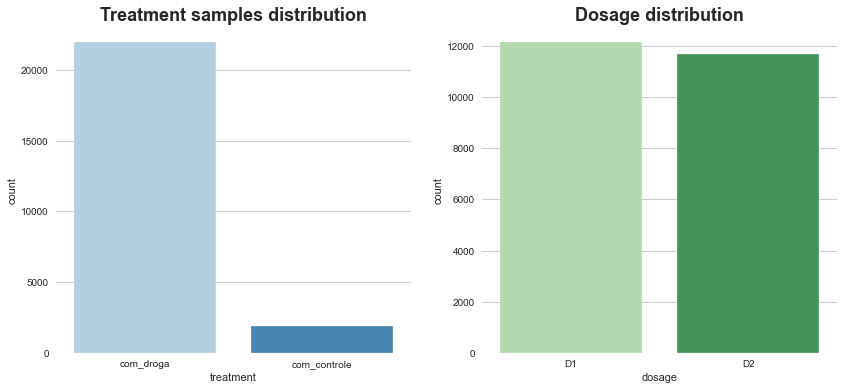

In [9]:
fig = plt.figure(figsize=(14,6))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x='treatment', data=data, palette='Blues')
plt.title('Treatment samples distribution', fontsize=18, weight='bold')
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x='dosage', data=data, palette='Greens')
plt.title('Dosage distribution',weight='bold', fontsize=18)
plt.show()

In [10]:
print('The time unique values are: \n', data['time'].unique())  # time of exposure until start the measurement
print('***'*20)
print('The time value counts are as follow: \n', data['time'].value_counts())
print('***'*20)
#Here we can identify a very balanced distribution of the time
print('The time percentage distribution is as follow: \n', data['time'].value_counts(normalize = True)* 100)

The time unique values are: 
 [24 72 48]
************************************************************
The time value counts are as follow: 
 48    8250
72    7792
24    7772
Name: time, dtype: int64
************************************************************
The time percentage distribution is as follow: 
 48    34.643487
72    32.720249
24    32.636264
Name: time, dtype: float64


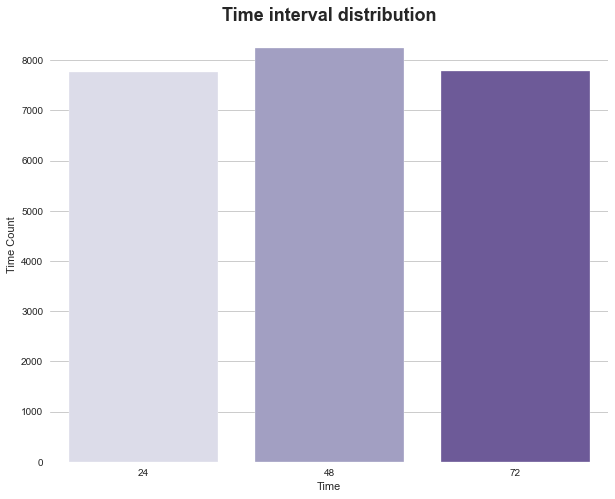

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(data = data, x= 'time', palette= 'Purples')
plt.title('Time interval distribution', fontsize=18, weight='bold')
plt.xlabel('Time')
plt.ylabel('Time Count')
plt.show();

### Understanding the drug feature


In [12]:
print('The drug unique values are: \n', data['drug'].unique())
print('***'* 20)
print('The number of drug investigated by the research was: ', data['drug'].nunique())
print('***'* 20)
print('The drug percentage distribution are: \n', data['drug'].value_counts(normalize = True) * 100)

The drug unique values are: 
 ['b68db1d53' 'df89a8e5a' '18bb41b2c' ... '573c787a2' 'b2fe3eca7'
 'dd4a96d16']
************************************************************
The number of drug investigated by the research was:  3289
************************************************************
The drug percentage distribution are: 
 cacb2b860    7.835727
87d714366    3.015033
9f80f3f77    1.033006
8b87a7a83    0.852440
5628cb3ee    0.848241
               ...   
e3e768009    0.004199
e3fe7b417    0.004199
5def38f5f    0.004199
14886a5b2    0.004199
a1a9a44dd    0.004199
Name: drug, Length: 3289, dtype: float64


### First Insights

- Features g(0 to 771) represents gene expression data.

- Features c (0 to 99) represents cell viability data.
 
- Treatment indicates samples treated with drug and with controle. The control group does not have any intervention (like a test set in data science), while the drug group has received drug intervention and can be compared with the train set (where we can implement parameters to improve results and compare with test set).

_The reason for class treatment been unbalancead, can be by the fact that is a test set to compare the results obtain by the group that was submitted with drug manipulation._

- Time and dosage indicate treatment interval duration (24, 48, 72 hours) and dosage seems to be classified as (high or low).

- The total drugs tested are 3289.


### Exploring the Genes columns

In [13]:
data['g0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

In [14]:
#filter the column 'g-0' and display only the values above 0.

data_g0_filtered = data[data['g0'] > 0]
data_g0_filtered.head()

,id,treatment,time,dosage,drug,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,g40,g41,g42,g43,g44,g45,g46,g47,g48,g49,g50,g51,g52,g53,g54,g55,g56,g57,g58,g59,g60,g61,g62,g63,g64,g65,g66,g67,g68,g69,g70,g71,g72,g73,g74,g75,g76,g77,g78,g79,g80,g81,g82,g83,g84,g85,g86,g87,g88,g89,g90,g91,g92,g93,g94,g95,g96,g97,g98,g99,g100,g101,g102,g103,g104,g105,g106,g107,g108,g109,g110,g111,g112,g113,g114,g115,g116,g117,g118,g119,g120,g121,g122,g123,g124,g125,g126,g127,g128,g129,g130,g131,g132,g133,g134,g135,g136,g137,g138,g139,g140,g141,g142,g143,g144,g145,g146,g147,g148,g149,g150,g151,g152,g153,g154,g155,g156,g157,g158,g159,g160,g161,g162,g163,g164,g165,g166,g167,g168,g169,g170,g171,g172,g173,g174,g175,g176,g177,g178,g179,g180,g181,g182,g183,g184,g185,g186,g187,g188,g189,g190,g191,g192,g193,g194,g195,g196,g197,g198,g199,g200,g201,g202,g203,g204,g205,g206,g207,g208,g209,g210,g211,g212,g213,g214,g215,g216,g217,g218,g219,g220,g221,g222,g223,g224,g225,g226,g227,g228,g229,g230,g231,g232,g233,g234,g235,g236,g237,g238,g239,g240,g241,g242,g243,g244,g245,g246,g247,g248,g249,g250,g251,g252,g253,g254,g255,g256,g257,g258,g259,g260,g261,g262,g263,g264,g265,g266,g267,g268,g269,g270,g271,g272,g273,g274,g275,g276,g277,g278,g279,g280,g281,g282,g283,g284,g285,g286,g287,g288,g289,g290,g291,g292,g293,g294,g295,g296,g297,g298,g299,g300,g301,g302,g303,g304,g305,g306,g307,g308,g309,g310,g311,g312,g313,g314,g315,g316,g317,g318,g319,g320,g321,g322,g323,g324,g325,g326,g327,g328,g329,g330,g331,g332,g333,g334,g335,g336,g337,g338,g339,g340,g341,g342,g343,g344,g345,g346,g347,g348,g349,g350,g351,g352,g353,g354,g355,g356,g357,g358,g359,g360,g361,g362,g363,g364,g365,g366,g367,g368,g369,g370,g371,g372,g373,g374,g375,g376,g377,g378,g379,g380,g381,g382,g383,g384,g385,g386,g387,g388,g389,g390,g391,g392,g393,g394,g395,g396,g397,g398,g399,g400,g401,g402,g403,g404,g405,g406,g407,g408,g409,g410,g411,g412,g413,g414,g415,g416,g417,g418,g419,g420,g421,g422,g423,g424,g425,g426,g427,g428,g429,g430,g431,g432,g433,g434,g435,g436,g437,g438,g439,g440,g441,g442,g443,g444,g445,g446,g447,g448,g449,g450,g451,g452,g453,g454,g455,g456,g457,g458,g459,g460,g461,g462,g463,g464,g465,g466,g467,g468,g469,g470,g471,g472,g473,g474,g475,g476,g477,g478,g479,g480,g481,g482,g483,g484,g485,g486,g487,g488,g489,g490,g491,g492,g493,g494,g495,g496,g497,g498,g499,g500,g501,g502,g503,g504,g505,g506,g507,g508,g509,g510,g511,g512,g513,g514,g515,g516,g517,g518,g519,g520,g521,g522,g523,g524,g525,g526,g527,g528,g529,g530,g531,g532,g533,g534,g535,g536,g537,g538,g539,g540,g541,g542,g543,g544,g545,g546,g547,g548,g549,g550,g551,g552,g553,g554,g555,g556,g557,g558,g559,g560,g561,g562,g563,g564,g565,g566,g567,g568,g569,g570,g571,g572,g573,g574,g575,g576,g577,g578,g579,g580,g581,g582,g583,g584,g585,g586,g587,g588,g589,g590,g591,g592,g593,g594,g595,g596,g597,g598,g599,g600,g601,g602,g603,g604,g605,g606,g607,g608,g609,g610,g611,g612,g613,g614,g615,g616,g617,g618,g619,g620,g621,g622,g623,g624,g625,g626,g627,g628,g629,g630,g631,g632,g633,g634,g635,g636,g637,g638,g639,g640,g641,g642,g643,g644,g645,g646,g647,g648,g649,g650,g651,g652,g653,g654,g655,g656,g657,g658,g659,g660,g661,g662,g663,g664,g665,g666,g667,g668,g669,g670,g671,g672,g673,g674,g675,g676,g677,g678,g679,g680,g681,g682,g683,g684,g685,g686,g687,g688,g689,g690,g691,g692,g693,g694,g695,g696,g697,g698,g699,g700,g701,g702,g703,g704,g705,g706,g707,g708,g709,g710,g711,g712,g713,g714,g715,g716,g717,g718,g719,g720,g721,g722,g723,g724,g725,g726,g727,g728,g729,g730,g731,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50,c51,c52,c53,c54,c55,c56,c